In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

<AxesSubplot:xlabel='site', ylabel='transformed'>

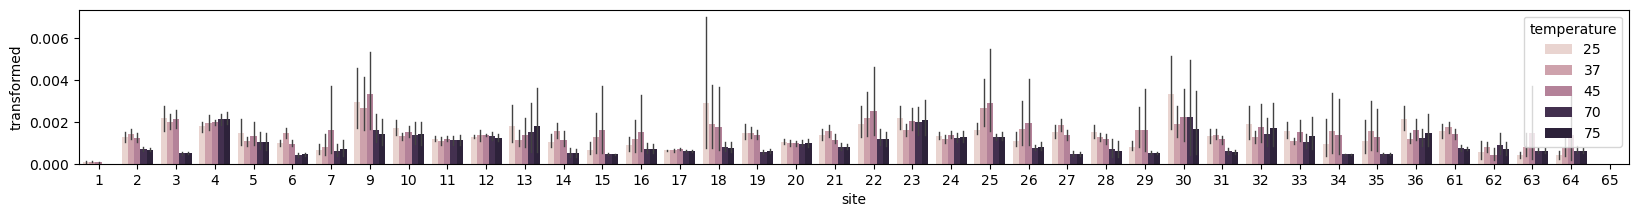

In [6]:
main_db = '/projects/b1044/Computational_Output/EKC/EKC.01_SHAPE_standardization/EKC.01.060.developing_DB_input/new.db'
# Connect to the SQLite database
conn = sqlite3.connect(main_db)
cursor = conn.cursor()

# Define the query
query = """
SELECT n.site, n.base, fv.fmod_val, c.disp_name, pr.temperature
FROM fmod_vals fv
JOIN probing_reactions pr ON pr.id = fv.rxn_id
JOIN nucleotides n ON n.id = fv.nt_id
JOIN constructs c ON c.id = pr.construct_id
WHERE pr.RT = 'MRT'
AND pr.treated = 0
AND fv.fmod_val is not NULL
AND c.family = 'Salm_4U_thermometer';
"""

fourU = pd.read_sql_query(query, conn)
conn.close()

fourU['transformed'] = fourU['fmod_val']

# filter to temps [25, 37, 45, 75]
fourU = fourU[fourU['temperature'].isin([25, 37, 45, 70, 75])]

# skip position 8
fourU = fourU[fourU['site'] != 8]
fig, ax = plt.subplots(figsize=(20, 2))
# Group by site
sns.barplot(x='site', y='transformed', hue = 'temperature', data=fourU, ax = ax, err_kws={'linewidth': 1})

/tmp/ipykernel_113756/1135340384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourU_site['transformed'] = np.log(fourU_site['fmod_val'])


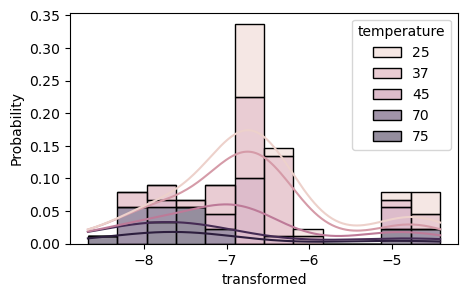

In [3]:
fourU_site = fourU[(fourU['site'] == 30) & (fourU['fmod_val'] > 0)]
fourU_site['transformed'] = np.log(fourU_site['fmod_val'])

fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=fourU_site, x='transformed', hue='temperature', multiple='stack', kde=True, ax=ax, stat = 'probability')
plt.show()

<AxesSubplot:xlabel='site', ylabel='transformed'>

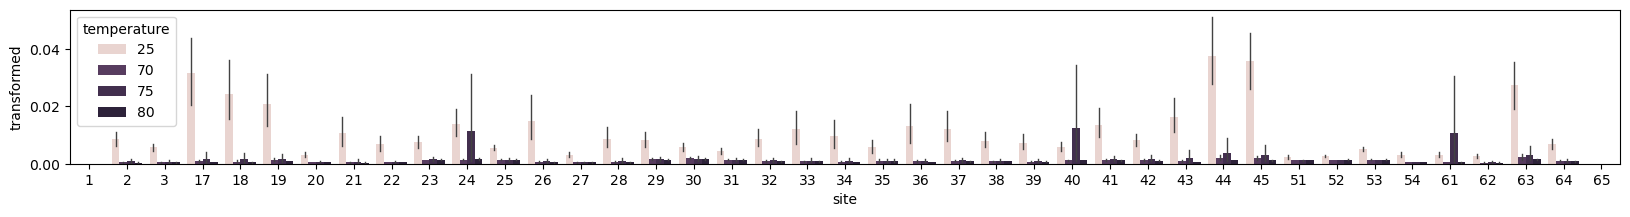

In [5]:
main_db = '/projects/b1044/Computational_Output/EKC/EKC.01_SHAPE_standardization/EKC.01.060.developing_DB_input/new.db'
# Connect to the SQLite database
conn = sqlite3.connect(main_db)
cursor = conn.cursor()

# Define the query
query = """
SELECT n.site, n.base, fv.fmod_val, c.disp_name, pr.temperature
FROM fmod_vals fv
JOIN probing_reactions pr ON pr.id = fv.rxn_id
JOIN nucleotides n ON n.id = fv.nt_id
JOIN constructs c ON c.id = pr.construct_id
WHERE pr.RT = 'MRT'
AND pr.treated = 0
AND fv.fmod_val is not NULL
AND c.family = 'HIV-1_TAR';
"""

hiv = pd.read_sql_query(query, conn)
conn.close()

hiv['transformed'] = hiv['fmod_val']
# skip position 8

fig, ax = plt.subplots(figsize=(20, 2))
# Group by site
sns.barplot(x='site', y='transformed', hue='temperature', data=hiv, ax=ax, err_kws={'linewidth': 1})

/tmp/ipykernel_203766/1195869712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiv_site['transformed'] = np.log(hiv_site['fmod_val'])


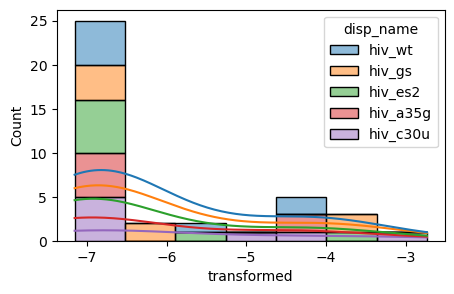

In [89]:
hiv_site = hiv[(hiv['site'] == 19) & (hiv['fmod_val'] > 0)]
hiv_site['transformed'] = np.log(hiv_site['fmod_val'])

fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=hiv_site, x='transformed', hue='disp_name', multiple='stack', kde=True, ax=ax)
plt.show()

<AxesSubplot:xlabel='site', ylabel='transformed'>

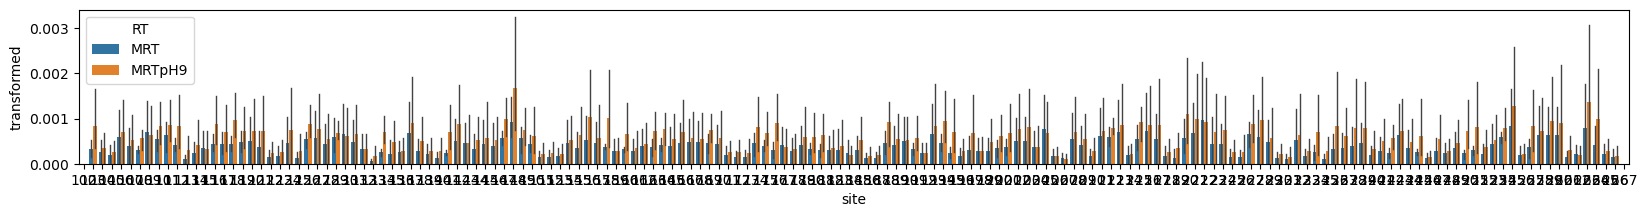

In [92]:
main_db = '/projects/b1044/Computational_Output/EKC/EKC.01_SHAPE_standardization/EKC.01.060.developing_DB_input/new.db'
# Connect to the SQLite database
conn = sqlite3.connect(main_db)
cursor = conn.cursor()

# Define the query
query = """
SELECT n.site, n.base, fv.fmod_val, c.disp_name, pr.temperature, pr.RT
FROM fmod_vals fv
JOIN probing_reactions pr ON pr.id = fv.rxn_id
JOIN nucleotides n ON n.id = fv.nt_id
JOIN constructs c ON c.id = pr.construct_id
WHERE pr.treated = 0
AND fv.fmod_val is not NULL
AND c.disp_name = 'p4p6_wt_nobc';
"""

p4p6 = pd.read_sql_query(query, conn)
conn.close()

p4p6['transformed'] = -np.log(1 - p4p6['fmod_val'])
# skip position 8
p4p6 = p4p6[p4p6['site'] != 8]
fig, ax = plt.subplots(figsize=(20, 2))
# Group by site
sns.barplot(x='site', y='transformed', hue = 'RT', data=p4p6, ax = ax, err_kws={'linewidth': 1})